## Install Packages and Import Libraries

In [2]:
from os.path import exists

from pandas import read_csv
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install fuzzywuzzy
!pip install sqlalchemy pyodbc
!pip install statsmodels
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates f

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from fuzzywuzzy import process
import math
from sqlalchemy import create_engine
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Suppress only FutureWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)  # Suppress DeprecationWarnings

C:\Users\abdel\PycharmProjects\PythonProject\.venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Read Data and Check Up

In [4]:
file_path = r'C:\Projects\AIMM\R Inputs\7 Funded African Tech Startups 2023 (by country and by sector).csv'
df = pd.read_csv(file_path)
df

,Startup,Location,Sector,Date,Amount (US$),Investors,Stage,Debt/Equity,Female co-founder?,Female CEO?,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,iProcure,Kenya,agri-tech,January + March,"280,000.00",Lendahand,Undisclosed,Debt,Yes,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oyster Agribusiness,Ghana,agri-tech,August,"310,000.00",NaN,Undisclosed,Debt,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Complete Farmer,Ghana,agri-tech,September,"10,400,000.00",Acumen Resilient Agriculture Fund (ARAF) and A...,Pre-Series A,Debt/equity,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Agro Supply,Uganda,agri-tech,January,"100,000.00",Catalyst Fund,Undisclosed,Equity,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Agroeknor,Nigeria,agri-tech,January,NaN,Aruwa Capital,Undisclosed,Equity,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Twende App,Ivory Coast,transport,July,"540,000.00","CIBAN (Côte d'Ivoire Business Angel Network), ...",Pre-seed,Equity,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
402,VotreChauffeur,Morocco,transport,March,"120,000.00",Afrimobility,Undisclosed,Equity,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,BD Waste,Ghana,waste management,January,"18,000.00",Startupbootcamp AfriTech,Undisclosed,Equity,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,Bekia,Egypt,waste management,January,"100,000.00",Catalyst Fund,Undisclosed,Equity,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Startup             406 non-null    object 
 1   Location            406 non-null    object 
 2   Sector              406 non-null    object 
 3   Date                394 non-null    object 
 4   Amount (US$)        237 non-null    object 
 5   Investors           385 non-null    object 
 6   Stage               406 non-null    object 
 7   Debt/Equity         406 non-null    object 
 8   Female co-founder?  406 non-null    object 
 9   Female CEO?         406 non-null    object 
 10  Local founder?      406 non-null    object 
 11  Intnl founder?      406 non-null    object 
 12  Launched?           406 non-null    int64  
 13  Accelerator?        406 non-null    object 
 14  Employees           406 non-null    object 
 15  Unnamed: 15         0 non-null      float64
 16  Unnamed:

## Clean Data

In [6]:
# Drop the empty columns
columns_to_drop = df.columns[df.isnull().all()]
df2 = df.drop(columns=columns_to_drop)

In [7]:
# Look at the number of unique values
for column in df2.columns:
    print(f"{column}: {df2[column].nunique()} unique values")

Startup: 406 unique values
Location: 26 unique values
Sector: 22 unique values
Date: 26 unique values
Amount (US$): 112 unique values
Investors: 255 unique values
Stage: 12 unique values
Debt/Equity: 4 unique values
Female co-founder?: 2 unique values
Female CEO?: 2 unique values
Local founder?: 2 unique values
Intnl founder?: 2 unique values
Launched?: 18 unique values
Accelerator?: 2 unique values
Employees: 124 unique values


In [8]:
# Select columns from the dataframe with more unique values than expected
columns_to_check = df2[['Stage', 'Debt/Equity', 'Date']]

# Print distinct values
for column in columns_to_check:
    print(f"Distinct values in '{column}': {df2[column].unique()}")

Distinct values in 'Stage': ['Undisclosed' 'Pre-Series A' 'Series B' 'Series A' 'Pre-seed' 'Pre-Seed'
 'Seed' 'Series A ' 'Series C' 'Pre-Series C' 'Pre-Series B'
 'Pre-Series A ']
Distinct values in 'Debt/Equity': ['Debt' 'Debt/equity' 'Equity' 'Debt/Equity']
Distinct values in 'Date': ['January + March' 'August' 'September' 'January' 'November' 'June'
 'April' 'July' 'January (+ extra)' nan 'May' 'February' 'December'
 'October' 'March' 'February, May, July, November' 'January + December'
 'August + November' 'May + November' 'February, April, July, August'
 'May + October' 'March + July' 'February + October' 'February + June'
 'February, April, October' 'July, August' 'January + November']


In [9]:
# Define the columns to align
columns_to_align = ['Stage', 'Debt/Equity', 'Date']

# Create a function to align values in a column
def align_column_values(df2, column, threshold=90):

# Get unique values in the column
    unique_values = df2[column].dropna().unique()
    aligned_values = {}

# Align similar values based on a threshold
    for value in unique_values:
        match, score = process.extractOne(value, unique_values)
        if score >= threshold:
            aligned_values[value] = match
        else:
            aligned_values[value] = value

 # Map aligned values back to the column
    df2[column] = df2[column].map(aligned_values)
    return df2

# Apply alignment to the specified columns
for col in columns_to_align:
    df2 = align_column_values(df2, col)

In [10]:
# Select columns from the dataframe with more unique values than expected
columns_to_check = df2[['Stage', 'Debt/Equity', 'Date']]

# Print distinct values
for column in columns_to_check:
    print(f"Distinct values in '{column}': {df2[column].unique()}")

Distinct values in 'Stage': ['Undisclosed' 'Pre-Series A' 'Series B' 'Series A' 'Pre-seed' 'Seed'
 'Series C' 'Pre-Series C' 'Pre-Series B']
Distinct values in 'Debt/Equity': ['Debt' 'Debt/equity' 'Equity']
Distinct values in 'Date': ['January + March' 'August' 'September' 'January' 'November' 'June'
 'April' 'July' 'January (+ extra)' nan 'May' 'February' 'December'
 'October' 'March' 'February, May, July, November' 'January + December'
 'August + November' 'May + November' 'February, April, July, August'
 'May + October' 'March + July' 'February + October' 'February + June'
 'February, April, October' 'July, August' 'January + November']


handling which month the funding was obtained is tricky due to bad data entry. We will separate it into a different database so it's easier to interpret.


In [11]:
date_df = df2[['Date','Amount (US$)']]
date_df.columns = ['Date', 'Amount (US$)']
date_df.head()

,Date,Amount (US$)
0,January + March,"280,000.00"
1,August,"310,000.00"
2,September,"10,400,000.00"
3,January,"100,000.00"
4,January,NaN


In [12]:
if 'Date' in df2.columns:
    df2.drop('Date', axis=1, inplace=True)
else:
    print("The column 'Date' does not exist in the DataFrame.")

This looks good for cleaning the data within the columns we can move onto addressing data types

## Data Types

In [13]:
# Date is monthly data of funding round/s, and year launched can be considered categorical; stage and debt/equity are also categorical
df2['Launched?'] = df2['Launched?'].astype('category')
df2['Stage'] = df2['Stage'].astype('category')
df2['Debt/Equity'] = df2['Debt/Equity'].astype('category')

# Get amount (US$), number of employees and year of launching data in numerical
df2['Amount (US$)'] = df2['Amount (US$)'].str.replace(',', '', regex=False)
df2['Amount (US$)'] = pd.to_numeric(df2['Amount (US$)'], errors='coerce')
df2['Employees'] = pd.to_numeric(df2['Employees'], errors='coerce')

# One-hot map yes/no columns to boolean values
yes_no_columns = [
    'Female co-founder?',
    'Female CEO?',
    'Local founder?',
    'Intnl founder?',
    'Accelerator?'
                        ]
for col in yes_no_columns:
    df2[col] = df2[col].map({'Yes': True, 'No': False})

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Startup             406 non-null    object  
 1   Location            406 non-null    object  
 2   Sector              406 non-null    object  
 3   Amount (US$)        237 non-null    float64 
 4   Investors           385 non-null    object  
 5   Stage               406 non-null    category
 6   Debt/Equity         406 non-null    category
 7   Female co-founder?  406 non-null    bool    
 8   Female CEO?         406 non-null    bool    
 9   Local founder?      406 non-null    bool    
 10  Intnl founder?      406 non-null    bool    
 11  Launched?           406 non-null    category
 12  Accelerator?        406 non-null    bool    
 13  Employees           405 non-null    float64 
dtypes: bool(5), category(3), float64(2), object(4)
memory usage: 23.5+ KB


## Exploratory Data Analysis

In [15]:
# Let's see the central tendency measures / distribution for the numerical columns (Amount and Employees)
df2.describe()

,Amount (US$),Employees
count,2.370000e+02,405.000000
mean,9.722042e+06,58.185185
std,4.116128e+07,140.030823
min,1.800000e+04,1.000000
25%,1.910000e+05,9.000000
50%,1.300000e+06,20.000000
75%,4.500000e+06,46.000000
max,5.100000e+08,1604.000000


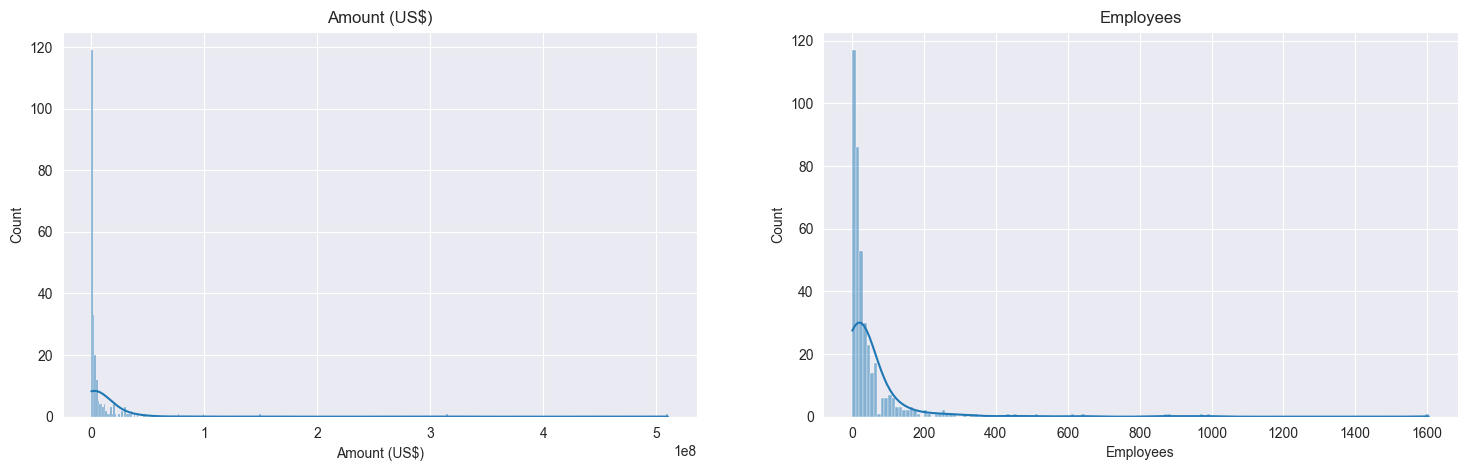

In [16]:
# Visual Distribution of numerical columns values
discol = ['Amount (US$)', 'Employees']

# Set up dimensions
columns_per_row = 2
num_columns = len(discol)
num_rows = math.ceil(num_columns/columns_per_row)
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(18, 5 * num_rows))
axes = axes.flatten()

# Visualizaiton parameters
for i, col in enumerate(discol):
    sns.histplot(df2[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

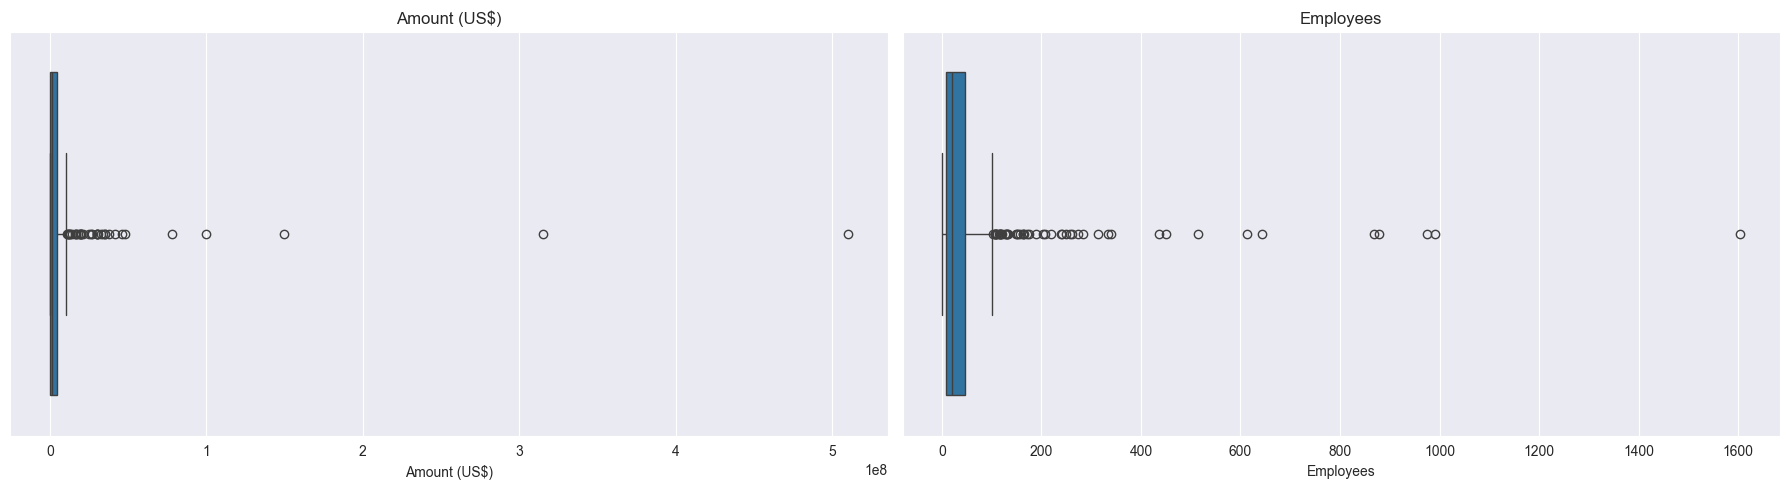

In [17]:
columns_per_row = 2
num_columns = len(discol)
num_rows = math.ceil(num_columns / columns_per_row)

fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(18, 5 * num_rows))
axes = axes.flatten()

for ax, col in zip(axes, discol):
    sns.boxplot(x=df2[col], ax=ax)
    ax.set_title(col)

for j in range(len(discol), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Data are heavily skewed to the right implying that most cases lean to the lower bound of the range compared to outliers with extremely high values to the positive side.

In [18]:
# Let's look at the outliers
Amount_Outliers = df2[(df2['Amount (US$)'] > 60000000)]
Amount_Outliers

,Startup,Location,Sector,Amount (US$),Investors,Stage,Debt/Equity,Female co-founder?,Female CEO?,Local founder?,Intnl founder?,Launched?,Accelerator?,Employees
158,Sun King (Greenlight Planet),Kenya,energy,150000000.0,"British International Investment (ex CDC), Sta...",Undisclosed,Debt,False,False,True,False,2007,False,1604.0
163,M-KOPA,Kenya,energy,315000000.0,"Standard Bank Group, (IFC), funds managed by L...",Undisclosed,Debt/equity,False,False,False,True,2011,False,NaN
190,MNT-Halan,Egypt,fintech,510000000.0,"Chimera Abu Dhabi, Commercial International Ba...",Undisclosed,Debt/equity,False,False,True,False,2018,False,274.0
301,Tyme,South Africa,fintech,77800000.0,Norrsken22 and Blue Earth Capital,Pre-Series C,Equity,True,False,True,False,2012,False,127.0
392,Planet42,South Africa,transport,100000000.0,"Naspers and ARS Holdings (equity), Rivonia Roa...",Undisclosed,Debt/equity,False,False,False,True,2017,False,162.0


In [19]:
Employees_Outlier = df2[(df2['Employees'] > 500)]
Employees_Outlier

,Startup,Location,Sector,Amount (US$),Investors,Stage,Debt/Equity,Female co-founder?,Female CEO?,Local founder?,Intnl founder?,Launched?,Accelerator?,Employees
5,Apollo Agriculture,Kenya,agri-tech,NaN,NaN,Undisclosed,Equity,False,False,True,True,2016,False,868.0
21,Twiga Foods,Kenya,agri-tech,35000000.0,"Creadev, Juven, TLCom Capital, DOB Equity",Undisclosed,Equity,False,False,True,False,2014,False,991.0
56,Copia Global,Kenya,e-commerce and retail-tech,20000000.0,"Enza Capital, LGT, Goodwell Investments, U.S. ...",Series C,Equity,True,False,False,True,2010,False,878.0
74,Omnibiz,Nigeria,e-commerce and retail-tech,NaN,Aruwa Capital,Undisclosed,Equity,False,False,True,False,2019,False,644.0
158,Sun King (Greenlight Planet),Kenya,energy,150000000.0,"British International Investment (ex CDC), Sta...",Undisclosed,Debt,False,False,True,False,2007,False,1604.0
160,d.light,Kenya,energy,30130000.0,"Lendahand (February), Swedfund (April), Lendah...",Undisclosed,Debt/equity,False,True,True,False,2007,False,975.0
183,FairMoney,Nigeria,fintech,5390000.0,NaN,Undisclosed,Debt,False,False,True,False,2017,False,614.0
390,Moove,Nigeria,transport,46000000.0,"Absa CIB, Mubadala Investment Company, Angel I...",Undisclosed,Debt/equity,False,False,True,False,2019,False,514.0


Kenya, Egypt and South Africa have 5 outliers in terms of funding amounts, the sectors are mainly energy and fintech.
Kenya and Nigeria have 8 outliers in terms of employment with the higher frequency being in Kenya, followed by Nigeria.

In [20]:
# Examine distribution of Categorical and Boolean Columns
df2.describe(include=['category','bool'])

,Stage,Debt/Equity,Female co-founder?,Female CEO?,Local founder?,Intnl founder?,Launched?,Accelerator?
count,406,406,406,406,406,406,406,406
unique,9,3,2,2,2,2,18,2
top,Undisclosed,Equity,False,False,True,False,2021,False
freq,258,372,299,344,389,369,97,208


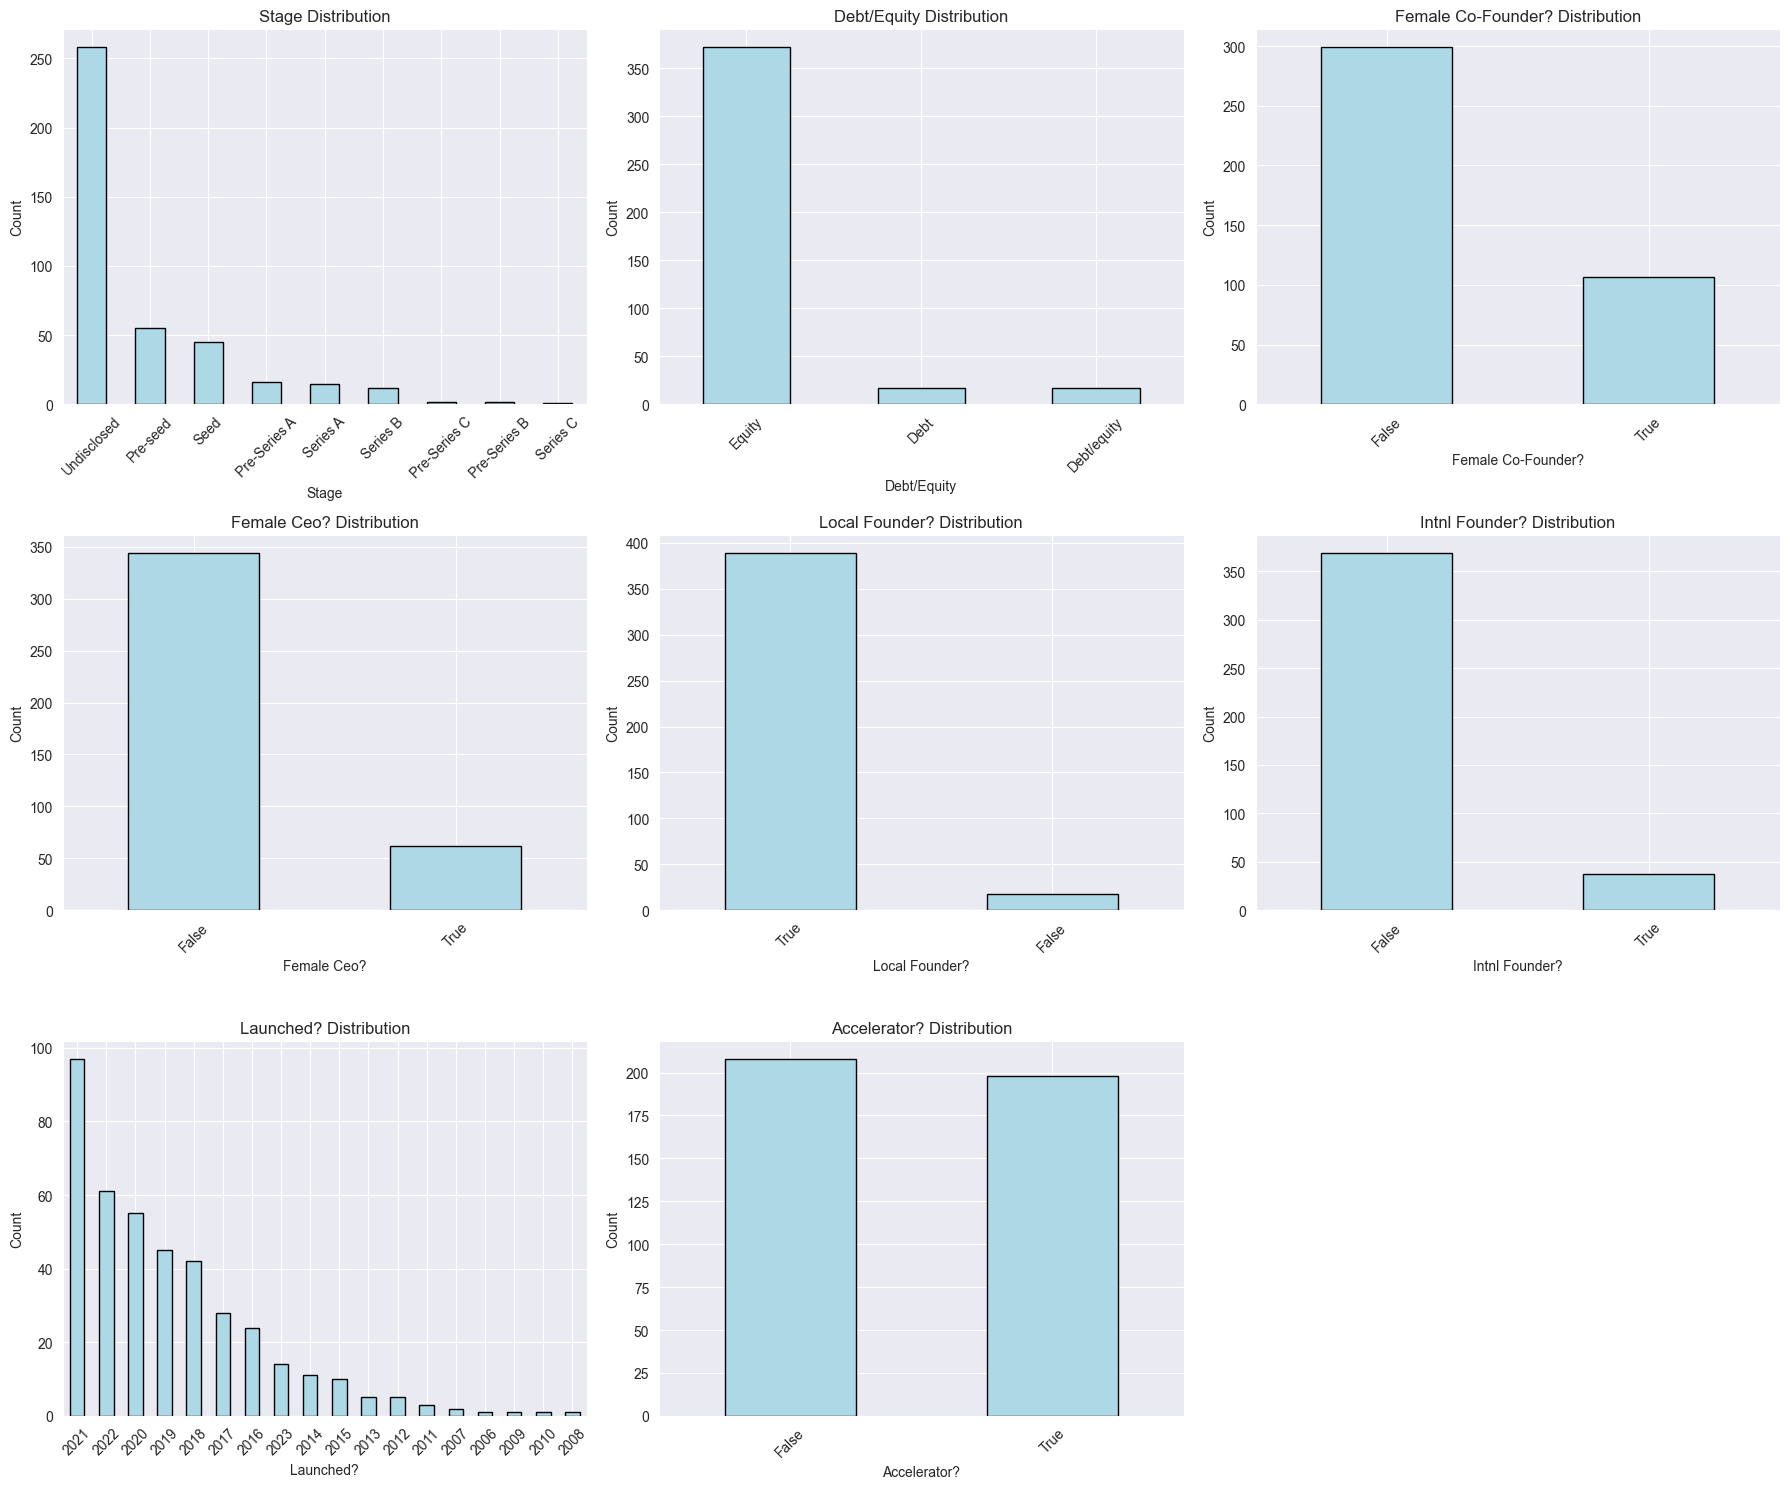

In [21]:
categorical_columns = df2.select_dtypes(include=['category', 'bool']).columns

# Identify parameters for overarching plot
columns_per_row = 3
num_columns = len(categorical_columns)
num_rows = math.ceil(num_columns / columns_per_row)
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(18, 5 * num_rows))
axes = axes.flatten()

# Create a bar plot for each categorical column
for i, col in enumerate(categorical_columns):
    # Count occurrences in the categorical column
    counts = df2[col].value_counts()

    # Plot a bar chart
    counts.plot(kind='bar', ax=axes[i], color='lightblue', edgecolor='black')

    # Set plot titles and labels
    axes[i].set_title(f'{col.replace("_", " ").title()} Distribution')
    axes[i].set_xlabel(col.replace('_', ' ').title())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused axes if the number of columns is less than the grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

We already have some significant results:
1) Most tech startups refused to declare their current stage / the stage at which they got funding
2) Most startups got funding through equity
3) Most startups did not have a female co-founder, and do not have a female CEO.
4) Most startups had a local founder, and did not have an international founder.
5) The year 2021 saw the largest number of fund startups launches through 2008-2023 by a significant margin.
6) Almost half the startups used an accelerator, while half did not.

## Correlation Examination

In [22]:
encoded_df2 = df2.copy()

# Encode boolean columns as integers
boolean_columns = encoded_df2.select_dtypes(include=['bool']).columns
encoded_df2[boolean_columns] = encoded_df2[boolean_columns].astype(int)

# Encode categorical columns using LabelEncoder
categorical_columns = encoded_df2.select_dtypes(include=['category', 'object']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    encoded_df2[col] = le.fit_transform(encoded_df2[col].astype(str))  # Convert to strings and encode
    label_encoders[col] = le  # Store encoders for potential inverse transformation

# Compute the correlation matrix with encoded data
correlation_matrix = encoded_df2.corr()

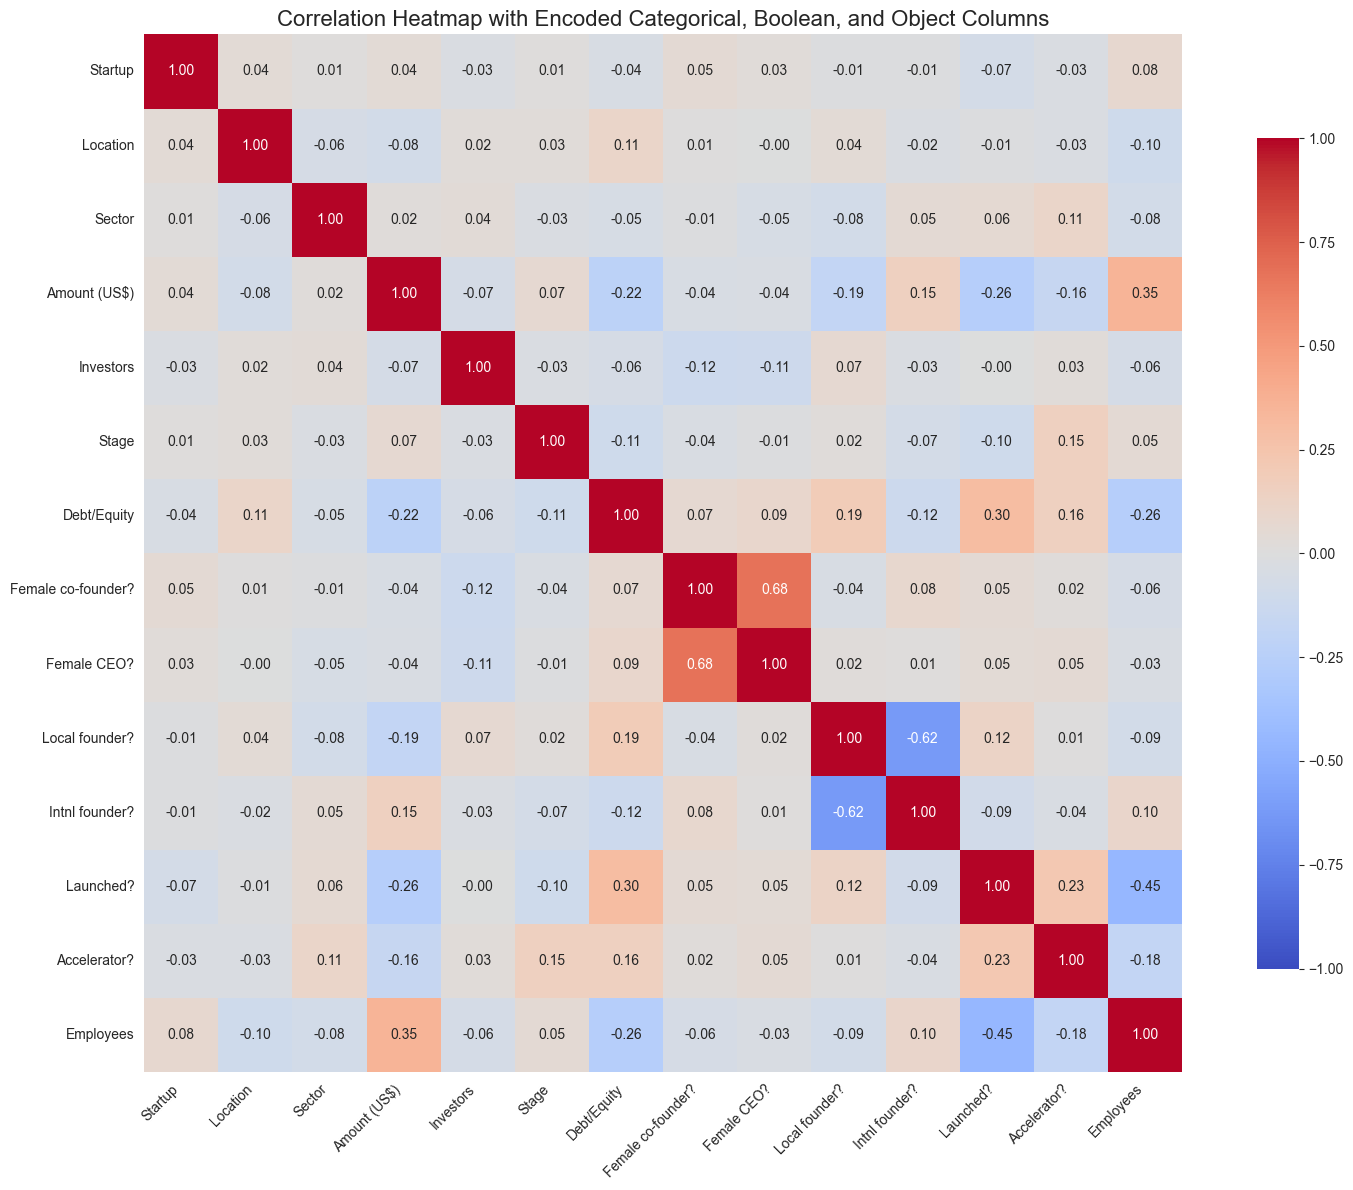

In [23]:
# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            square=True,
            vmin=-1,
            vmax=1,
            cbar_kws={"shrink": .8},
            annot_kws={"size": 10})
plt.title('Correlation Heatmap with Encoded Categorical, Boolean, and Object Columns', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

A bilateral examination of the variables show no significant relationships except the following:
1. A weak positive relationship between the number of employees and the amount of funding received in year 2023
2. Moderate positive relationship between the CEO being a female and having a female co-founder
3. A moderate negative relationship between having an international and local founder.
4. A moderate negative relationship between the number of employees and launching date. This implies that the longer the startup has been in operation, the larger number of employees.

## Addressing Missing Data

Due to the absence of strong bilateral relationships, we will proceed with addressing missing data without utilizing correlation.

In [24]:
missing_data = df2.isnull().sum()

# Percentage of missing values
missing_percentage = (df2.isnull().sum() / len(df2)) * 100

# Display missing data summary
missing_summary = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})
print(missing_summary)

                    Missing Count  Missing Percentage
Startup                         0            0.000000
Location                        0            0.000000
Sector                          0            0.000000
Amount (US$)                  169           41.625616
Investors                      21            5.172414
Stage                           0            0.000000
Debt/Equity                     0            0.000000
Female co-founder?              0            0.000000
Female CEO?                     0            0.000000
Local founder?                  0            0.000000
Intnl founder?                  0            0.000000
Launched?                       0            0.000000
Accelerator?                    0            0.000000
Employees                       1            0.246305


In [25]:
# Replace NaN values in the 'investors' column with "not announced"
df2['Investors'] = df2['Investors'].fillna("NA")
# Replace NaN value in the 'Employees' column with the most appropriate central tendency measure, the median since data is skewed
df2['Employees'] = df2['Employees'].fillna(df2['Employees'].median())

Since a significant portion of the data related to amount is missing (41.6%), we will predict the values using a machine learning program.

In [26]:
# Prepare data
train_data = df2[df2['Amount (US$)'].notnull()]
test_data = df2[df2['Amount (US$)'].isnull()]

X_train = train_data.drop(columns=['Amount (US$)'])
y_train = train_data['Amount (US$)']
X_test = test_data.drop(columns=['Amount (US$)'])

# Encode categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict missing values
df2.loc[df2['Amount (US$)'].isnull(), 'Amount (US$)'] = model.predict(X_test)

Now that we have predicted the missing amounts, we should see if correlation variables have highly been impacted, if results are similar to earlier, then we can proceed with analysis.

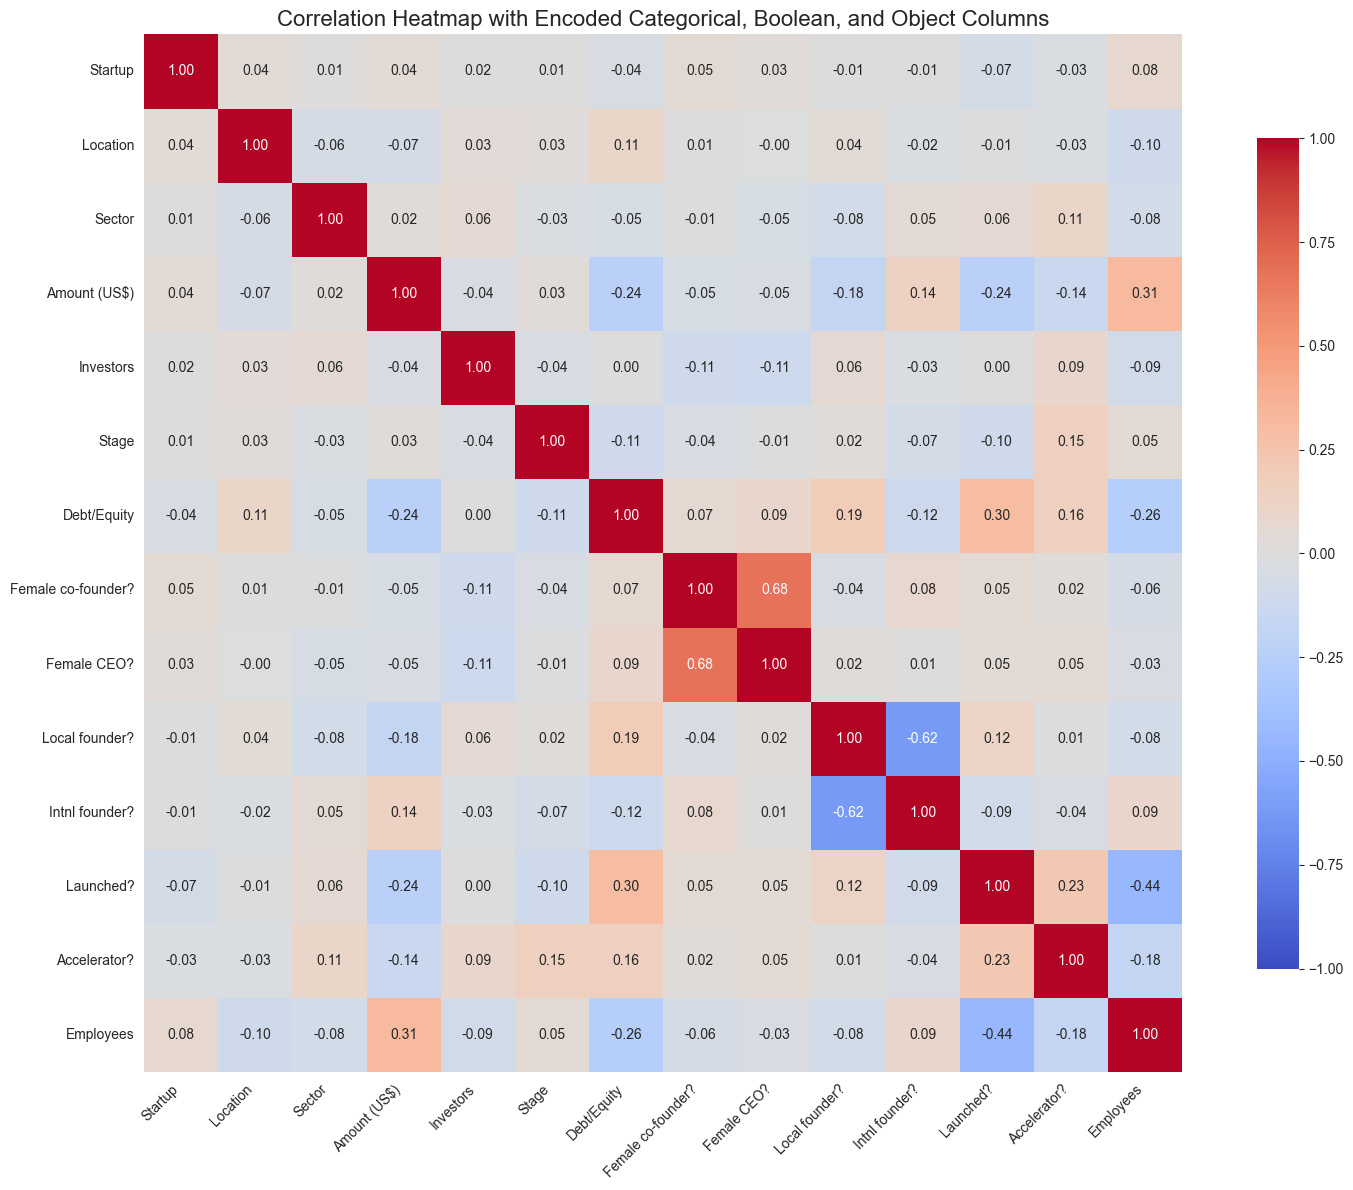

In [27]:
encoded_df2 = df2.copy()

# Encode boolean columns as integers
boolean_columns = encoded_df2.select_dtypes(include=['bool']).columns
encoded_df2[boolean_columns] = encoded_df2[boolean_columns].astype(int)

# Encode categorical columns using LabelEncoder
categorical_columns = encoded_df2.select_dtypes(include=['category', 'object']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    encoded_df2[col] = le.fit_transform(encoded_df2[col].astype(str))  # Convert to strings and encode
    label_encoders[col] = le  # Store encoders for potential inverse transformation

# Compute the correlation matrix with encoded data
correlation_matrix = encoded_df2.corr()
# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            square=True,
            vmin=-1,
            vmax=1,
            cbar_kws={"shrink": .8},
            annot_kws={"size": 10})
plt.title('Correlation Heatmap with Encoded Categorical, Boolean, and Object Columns', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [28]:
missing_data = df2.isnull().sum()

# Percentage of missing values
missing_percentage = (df2.isnull().sum() / len(df2)) * 100

# Display missing data summary
missing_summary = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})
print(missing_summary)

                    Missing Count  Missing Percentage
Startup                         0                 0.0
Location                        0                 0.0
Sector                          0                 0.0
Amount (US$)                    0                 0.0
Investors                       0                 0.0
Stage                           0                 0.0
Debt/Equity                     0                 0.0
Female co-founder?              0                 0.0
Female CEO?                     0                 0.0
Local founder?                  0                 0.0
Intnl founder?                  0                 0.0
Launched?                       0                 0.0
Accelerator?                    0                 0.0
Employees                       0                 0.0


## Save Clean Data to SQL library

After cleaning the data we can transmit it to SSMS as a table in the Africa_Tech_Startups database using SQL alchemy

In [29]:
# Define connection
server = 'RAVENLAPTOP'
database = 'Africa_Tech_Startups'
username = 'RAVENLAPTOP/abdel'
password = ''
connection_string = f'mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server'


# Create Engine
engine = create_engine(connection_string)

#Save Table
table_name = 'Cleaned_DataY23'
df2.to_sql('Cleaned_DataY23', con=engine, if_exists='replace', index=False)

print(f"Data saved successfully to table '{table_name}' in the database '{database}'.")

Data saved successfully to table 'Cleaned_DataY23' in the database 'Africa_Tech_Startups'.


Now the cleaned data with no missing values are available to be visualized in a PowerBI dashboard that we will connect to SSMS

## Regression Analysis

Now we have clean data, we can move into doing some econometrics. Since we are working on funding of the year 2023, we need to be very careful about the direction of causality. and interpreting the results.

## 1. Direct Impact

In [30]:
# 1.A. Economic Impact
# Relationship to Explore: How does Amount (US$) influence Employees?

categorical_vars = ['Sector', 'Location']
numeric_vars = ['Amount (US$)']

# Preprocessing categorical variables
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = pd.DataFrame(ohe.fit_transform(df2[categorical_vars]), columns=ohe.get_feature_names_out(categorical_vars))

# Combine processed categorical and numeric variables
X = pd.concat([encoded_cats, df2[numeric_vars].reset_index(drop=True)], axis=1)

# Add a constant for the regression model
X = sm.add_constant(X)

# Define the dependent variable
y = df2['Employees']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Employees   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1.782
Date:                Fri, 13 Dec 2024   Prob (F-statistic):            0.00197
Time:                        23:33:13   Log-Likelihood:                -2538.9
No. Observations:                 406   AIC:                             5174.
Df Residuals:                     358   BIC:                             5366.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [31]:
# 1.B. Startup Maturity and Employment

categorical_vars = ['Sector', 'Location']
numeric_vars = ['Amount (US$)', 'Launched?']

# Preprocessing categorical variables
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = pd.DataFrame(ohe.fit_transform(df2[categorical_vars]), columns=ohe.get_feature_names_out(categorical_vars))

# Combine processed categorical and numeric variables
X = pd.concat([encoded_cats, df2[numeric_vars].reset_index(drop=True)], axis=1)

# Add a constant for the regression model
X = sm.add_constant(X)

# Define the dependent variable
y = df2['Employees']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Employees   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     3.326
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           5.98e-11
Time:                        23:33:13   Log-Likelihood:                -2506.5
No. Observations:                 406   AIC:                             5111.
Df Residuals:                     357   BIC:                             5307.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [32]:
# Preprocessing categorical variables
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = pd.DataFrame(ohe.fit_transform(df2[categorical_vars]), columns=ohe.get_feature_names_out(categorical_vars))

# Combine processed categorical and numeric variables
X = pd.concat([encoded_cats, df2[numeric_vars].reset_index(drop=True)], axis=1)

# Add a constant for the regression model
X = sm.add_constant(X)

# Define the dependent variable
y = df2['Employees']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Employees   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     3.326
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           5.98e-11
Time:                        23:33:14   Log-Likelihood:                -2506.5
No. Observations:                 406   AIC:                             5111.
Df Residuals:                     357   BIC:                             5307.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [33]:
# 1.C. Stage and Employment
# Variables to include in the model
categorical_vars = ['Sector', 'Location', 'Stage']
numeric_vars = ['Amount (US$)', 'Launched?']

# Preprocessing categorical variables
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = pd.DataFrame(ohe.fit_transform(df2[categorical_vars]), columns=ohe.get_feature_names_out(categorical_vars))

# Combine processed categorical and numeric variables
X = pd.concat([encoded_cats, df2[numeric_vars].reset_index(drop=True)], axis=1)

# Add a constant for the regression model
X = sm.add_constant(X)

# Define the dependent variable
y = df2['Employees']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Employees   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     3.467
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           8.70e-13
Time:                        23:33:14   Log-Likelihood:                -2491.7
No. Observations:                 406   AIC:                             5097.
Df Residuals:                     349   BIC:                             5326.
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

## 2. Inclusivity Metrics

In [34]:
# 2.A.1 Does having a Female co-founder or Female CEO affect the Amount (US$) raised?

# Convert Boolean Values to integers for regression
df2['Female co-founder?'] = df2['Female co-founder?'].astype(int)
df2['Female CEO?'] = df2['Female CEO?'].astype(int)

threshold = 1_000_000
df2['High_Funding'] = (df2['Amount (US$)'] > threshold).astype(int)

# Define independent variables
X_gender = df2[['Female co-founder?', 'Female CEO?']]
X_gender = sm.add_constant(X_gender)  # Add constant

# Define dependent variable
y_high_funding = df2['High_Funding']

# Fit logistic regression model
logit_model = sm.Logit(y_high_funding, X_gender).fit()

# Print the summary
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.690251
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           High_Funding   No. Observations:                  406
Model:                          Logit   Df Residuals:                      403
Method:                           MLE   Df Model:                            2
Date:                Fri, 13 Dec 2024   Pseudo R-squ.:                0.003742
Time:                        23:33:14   Log-Likelihood:                -280.24
converged:                       True   LL-Null:                       -281.29
Covariance Type:            nonrobust   LLR p-value:                    0.3490
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0094      0.116      0.082      0.935      -0.217       0.236
Femal

In [35]:
# 2.A.2 Do startups led by Female co-founders or Female CEOs employ more Employees?

# Define independent variables
X_employment_gender = df2[['Female co-founder?', 'Female CEO?']]
X_employment_gender = sm.add_constant(X_employment_gender)  # Add constant

# Define dependent variable
y_employees = df2['Employees']

# Fit OLS regression model
ols_model_gender = sm.OLS(y_employees, X_employment_gender).fit()

# Print the summary
print(ols_model_gender.summary())

                            OLS Regression Results                            
Dep. Variable:              Employees   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7461
Date:                Fri, 13 Dec 2024   Prob (F-statistic):              0.475
Time:                        23:33:14   Log-Likelihood:                -2580.8
No. Observations:                 406   AIC:                             5168.
Df Residuals:                     403   BIC:                             5180.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 63.0741      8

In [36]:
# 2.B.1 How do Local founders or International founders impact Amount (US$)?
# Change Boolian values to Integer for regrssion
df2['Local founder?'] = df2['Local founder?'].astype(int)
df2['Intnl founder?'] = df2['Intnl founder?'].astype(int)

# Define independent variables
X_funding_founders = df2[['Local founder?', 'Intnl founder?']]
X_funding_founders = sm.add_constant(X_funding_founders)  # Add constant

# Define dependent variable
y_funding = df2['Amount (US$)']

# Fit OLS regression model
ols_model_funding_founders = sm.OLS(y_funding, X_funding_founders).fit()

# Print the summary
print(ols_model_funding_founders.summary())

                            OLS Regression Results                            
Dep. Variable:           Amount (US$)   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     6.842
Date:                Fri, 13 Dec 2024   Prob (F-statistic):            0.00120
Time:                        23:33:14   Log-Likelihood:                -7582.9
No. Observations:                 406   AIC:                         1.517e+04
Df Residuals:                     403   BIC:                         1.518e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.913e+07   9.99e+06      2.

In [37]:
# 2.B.2 How do Local founders or International founders impact Employees?

# Define independent variables
X_employment_founders = df2[['Local founder?', 'Intnl founder?']]
X_employment_founders = sm.add_constant(X_employment_founders)  # Add constant

# Define dependent variable
y_employees = df2['Employees']

# Fit OLS regression model
ols_model_employment_founders = sm.OLS(y_employees, X_employment_founders).fit()

# Print the summary
print(ols_model_employment_founders.summary())

                            OLS Regression Results                            
Dep. Variable:              Employees   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.953
Date:                Fri, 13 Dec 2024   Prob (F-statistic):              0.143
Time:                        23:33:14   Log-Likelihood:                -2579.6
No. Observations:                 406   AIC:                             5165.
Df Residuals:                     403   BIC:                             5177.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             78.5166     44.434      1.

## 3. Market Creation Effects

In [38]:
# 3.A. Sector and Ecosystem Growth

sector_ohe = OneHotEncoder(drop='first', sparse_output=False)
sector_encoded = pd.DataFrame(sector_ohe.fit_transform(df2[['Sector']]), columns=sector_ohe.get_feature_names_out(['Sector']))

# Independent variables for regression
X_sector = pd.concat([sector_encoded, df2[['Amount (US$)']].reset_index(drop=True)], axis=1)
X_sector = sm.add_constant(X_sector)  # Add constant

# Dependent variable: Employees
y_employees = df2['Employees']

# Fit OLS model
sector_model_employees = sm.OLS(y_employees, X_sector).fit()
print("Sector and Employees Model Summary:")
print(sector_model_employees.summary())

Sector and Employees Model Summary:
                            OLS Regression Results                            
Dep. Variable:              Employees   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     2.973
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           1.15e-05
Time:                        23:33:14   Log-Likelihood:                -2549.5
No. Observations:                 406   AIC:                             5145.
Df Residuals:                     383   BIC:                             5237.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [39]:
# 3.B. Accelerator Participation
# Ensure the Accelerator? column is numeric
df2['Accelerator?'] = df2['Accelerator?'].astype(int)

# Independent variables for Accelerator participation
X_accelerator = df2[['Accelerator?']]
X_accelerator = sm.add_constant(X_accelerator)  # Add constant

# Dependent variable: Amount (US$)
y_amount = df2['Amount (US$)']

# Fit OLS model for funding
accelerator_model_funding = sm.OLS(y_amount, X_accelerator).fit()
print("Accelerator and Funding Model Summary:")
print(accelerator_model_funding.summary())

# Dependent variable: Employees
y_employees = df2['Employees']

# Fit OLS model for employment
accelerator_model_employees = sm.OLS(y_employees, X_accelerator).fit()
print("Accelerator and Employees Model Summary:")
print(accelerator_model_employees.summary())

Accelerator and Funding Model Summary:
                            OLS Regression Results                            
Dep. Variable:           Amount (US$)   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     7.642
Date:                Fri, 13 Dec 2024   Prob (F-statistic):            0.00596
Time:                        23:33:14   Log-Likelihood:                -7585.9
No. Observations:                 406   AIC:                         1.518e+04
Df Residuals:                     404   BIC:                         1.518e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const    

## 4. Additional Investigation

In [40]:
# 4.A. Debt vs. Equity Impact

# One-hot encode Debt/Equity
funding_type_ohe = OneHotEncoder(drop='first', sparse_output=False)
funding_type_encoded = pd.DataFrame(funding_type_ohe.fit_transform(df2[['Debt/Equity']]), columns=funding_type_ohe.get_feature_names_out(['Debt/Equity']))

# Independent variables for funding type
X_funding_type = pd.concat([funding_type_encoded], axis=1)
X_funding_type = sm.add_constant(X_funding_type)  # Add constant

# Dependent variable: Employees
y_employees = df2['Employees']

# Fit OLS model for employment
funding_type_model_employees = sm.OLS(y_employees, X_funding_type).fit()
print("Funding Type and Employees Model Summary:")
print(funding_type_model_employees.summary())

# Dependent variable: Amount (US$)
y_amount = df2['Amount (US$)']

# Fit OLS model for funding
funding_type_model_funding = sm.OLS(y_amount, X_funding_type).fit()
print("Funding Type and Funding Model Summary:")
print(funding_type_model_funding.summary())

Funding Type and Employees Model Summary:
                            OLS Regression Results                            
Dep. Variable:              Employees   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     14.91
Date:                Fri, 13 Dec 2024   Prob (F-statistic):           5.64e-07
Time:                        23:33:14   Log-Likelihood:                -2567.0
No. Observations:                 406   AIC:                             5140.
Df Residuals:                     403   BIC:                             5152.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [41]:
# 4.B. Geographic Factors

# One-hot encode Location
location_ohe = OneHotEncoder(drop='first', sparse_output=False)
location_encoded = pd.DataFrame(location_ohe.fit_transform(df2[['Location']]), columns=location_ohe.get_feature_names_out(['Location']))

# Independent variables for Location
X_location = pd.concat([location_encoded], axis=1)
X_location = sm.add_constant(X_location)  # Add constant

# Dependent variable: Employees
y_employees = df2['Employees']

# Fit OLS model for employment
location_model_employees = sm.OLS(y_employees, X_location).fit()
print("Location and Employees Model Summary:")
print(location_model_employees.summary())

# Dependent variable: Amount (US$)
y_amount = df2['Amount (US$)']

# Fit OLS model for funding
location_model_funding = sm.OLS(y_amount, X_location).fit()
print("Location and Funding Model Summary:")
print(location_model_funding.summary())

Location and Employees Model Summary:
                            OLS Regression Results                            
Dep. Variable:              Employees   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.9042
Date:                Fri, 13 Dec 2024   Prob (F-statistic):              0.600
Time:                        23:33:14   Log-Likelihood:                -2569.8
No. Observations:                 406   AIC:                             5192.
Df Residuals:                     380   BIC:                             5296.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

This is a good first approach. Now we should expand to include further information based on the dataset. It may have give a better fit. We need to do some research about variables to include (possibly macroeconomic indicators and from other sources/also to consult subject-matter experts).

further work should include feature engineering